In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
!ls server/

adj_hgsoc_metacells_with_control_20230927.tsv
hgsoc_metacells.h5ad
hgsoc_metacells_regulon_activity_20231005.csv
hgsoc_metacells_with_control_20230927.loom
loom_adata_combined_20230927.loom
loom_adata_combined_20231005.loom
pyscenic_output_hgsoc_metacells_with_control_20230927.loom
reg_hgsoc_metacells_with_control_20230927.csv
tf_gene_name_20231005.csv


In [3]:
!ls *clinical*

TCGA_clinical_information.csv clinical_info_20230927.csv
clinical_info_20230906.csv    clinical_info_20231005.csv


In [4]:
df = pd.read_csv("server/hgsoc_metacells_regulon_activity_20231005.csv", index_col = 0)
#clinical_df = pd.read_csv('clinical_info_20231005.csv')
clinical_df = pd.read_csv("clinical_info_20230927.csv")

In [5]:
df

,GSE_ID,GSM_ID,Treatment Status,Clinical stage,Clinical stage (Major,cell_type,louvain,AHCTF1_(+),AR_(+),ARID3A_(+),...,ZNF629_(+),ZNF740_(+),ZNF75A_(+),ZNF76_(+),ZNF768_(+),ZNF780A_(+),ZNF814_(+),ZNF823_(+),ZNF91_(+),ZSCAN2_(+)
SEACell-0_GSM4568674,GSE151214,GSM4568674,Control,normal fallopian tube,Normal fallopian tube,T cell,1,0.0,0.000000,0.031915,...,0.000000,0.0,0.0,0.011150,0.034270,0.0,0.057778,0.000000,0.021289,0.107143
SEACell-17_GSM4568674,GSE151214,GSM4568674,Control,normal fallopian tube,Normal fallopian tube,Epithelial,10,0.0,0.000000,0.026624,...,0.000000,0.0,0.0,0.011104,0.034239,0.0,0.056889,0.000000,0.024991,0.121111
SEACell-8_GSM4568674,GSE151214,GSM4568674,Control,normal fallopian tube,Normal fallopian tube,T cell,1,0.0,0.000000,0.051937,...,0.000000,0.0,0.0,0.011176,0.031197,0.0,0.056889,0.000000,0.020800,0.091111
SEACell-16_GSM4568674,GSE151214,GSM4568674,Control,normal fallopian tube,Normal fallopian tube,Endothelial,5,0.0,0.000000,0.017270,...,0.000000,0.0,0.0,0.012771,0.031394,0.0,0.052825,0.000000,0.022357,0.078730
SEACell-11_GSM4568674,GSE151214,GSM4568674,Control,normal fallopian tube,Normal fallopian tube,T cell,1,0.0,0.000000,0.045714,...,0.000000,0.0,0.0,0.010315,0.030966,0.0,0.057397,0.000000,0.020507,0.105238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-37_GSM6049631,GSE201047,GSM6049631,After chemotherapy,IIIB,III,Fibroblast,3,0.0,0.016996,0.032042,...,0.009004,0.0,0.0,0.012427,0.023320,0.0,0.048000,0.000000,0.020094,0.075238
SEACell-74_GSM6049631,GSE201047,GSM6049631,After chemotherapy,IIIB,III,Endothelial,5,0.0,0.000000,0.018709,...,0.000000,0.0,0.0,0.013593,0.030407,0.0,0.076952,0.000000,0.021858,0.081111
SEACell-4_GSM6049631,GSE201047,GSM6049631,After chemotherapy,IIIB,III,Endothelial,5,0.0,0.000000,0.018032,...,0.000000,0.0,0.0,0.013424,0.030037,0.0,0.077587,0.000000,0.021195,0.080476
SEACell-75_GSM6049631,GSE201047,GSM6049631,After chemotherapy,IIIB,III,Fibroblast,0,0.0,0.000000,0.048635,...,0.000000,0.0,0.0,0.013385,0.024978,0.0,0.053587,0.000000,0.019906,0.078254


In [6]:
len(df['GSM_ID'].unique())

31

In [7]:
clinical_df

,GSM_ID,Patient,Patient_2,location,Patient_Treatment_Status,Patient_Treatment_Status_Detailed
0,GSM5057578,Patient 1,Patient 1,Mesentery,Patient 1-Before Chemotherapy,Patient 1-Mesentery-Before Chemotherapy
1,GSM5057579,Patient 1,Patient 1,Omentum,Patient 1-After Chemotherapy,Patient 1-Omentum-After Chemotherapy
2,GSM5057582,Patient 2,Patient 2,Omentum,Patient 2-Before Chemotherapy,Patient 2-Omentum-Before Chemotherapy
3,GSM5057583,Patient 2,Patient 2,Omentum,Patient 2-After Chemotherapy,Patient 2-Omentum-After Chemotherapy
4,GSM5057588,Patient 3,Patient 3,Peritoneum,Patient 3-Before Chemotherapy,Patient 3-Peritoneum-Before Chemotherapy
5,GSM5057589,Patient 3,Patient 3,Omentum,Patient 3-After Chemotherapy,Patient 3-Omentum-After Chemotherapy
6,GSM5057590,Patient 4,Patient 4,Omentum,Patient 4-Before Chemotherapy,Patient 4-Omentum-Before Chemotherapy
7,GSM5057591,Patient 4,Patient 4,Omentum,Patient 4-After Chemotherapy,Patient 4-Omentum-After Chemotherapy
8,GSM6049625,Patient 5,Patient 5,Ovarian tumor,Patient 5-Before Chemotherapy,Patient 5-Ovarian tumor-Before Chemotherapy
9,GSM6049626,Patient 5,Patient 5,Ascites,Patient 5-Before Chemotherapy,Patient 5-Ascites-Before Chemotherapy


In [8]:
df_obs = df.iloc[:,:7]
df_adata = df.iloc[:,7:]

In [9]:
df_obs_clinical = pd.merge(df_obs, clinical_df, on='GSM_ID', how='inner')

In [10]:
df_obs_clinical.index = df_obs.index

In [11]:
adata = sc.AnnData(df_adata)

In [12]:
adata.obs = df_obs_clinical

In [13]:
adata.obs.columns

Index(['GSE_ID', 'GSM_ID', 'Treatment Status', 'Clinical stage',
       'Clinical stage (Major', 'cell_type', 'louvain', 'Patient', 'Patient_2',
       'location', 'Patient_Treatment_Status',
       'Patient_Treatment_Status_Detailed'],
      dtype='object')

In [14]:
adata.var

""
AHCTF1_(+)
AR_(+)
ARID3A_(+)
ARID5B_(+)
ARNT_(+)
...
ZNF780A_(+)
ZNF814_(+)
ZNF823_(+)
ZNF91_(+)


In [15]:
adata.obs['Patient'] = adata.obs['Patient'].astype(str)

In [16]:
sc.tl.pca(adata, svd_solver='arpack')

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [18]:
sc.tl.umap(adata)

In [19]:
adata.obs["cell_type"].unique()

array(['T cell', 'Epithelial', 'Endothelial', 'Myeloid cell / macrophage',
       'Fibroblast', 'Mast cell', 'B cell / plasma cell', 'unknown'],
      dtype=object)

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


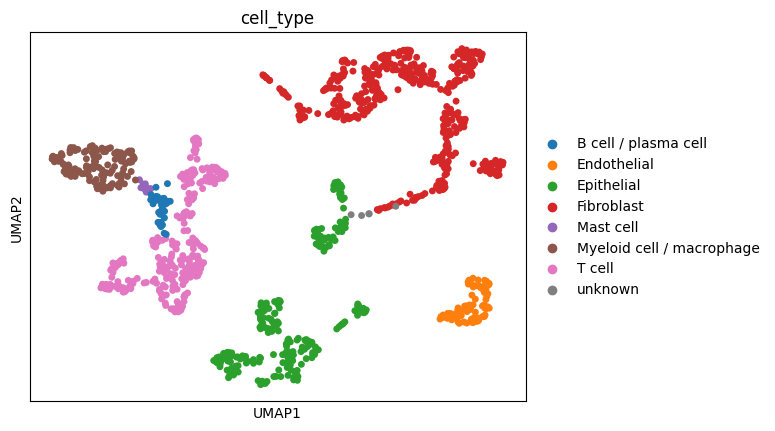

In [20]:
sc.pl.umap(adata, color = ["cell_type"], save = 'cell_type.png')

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


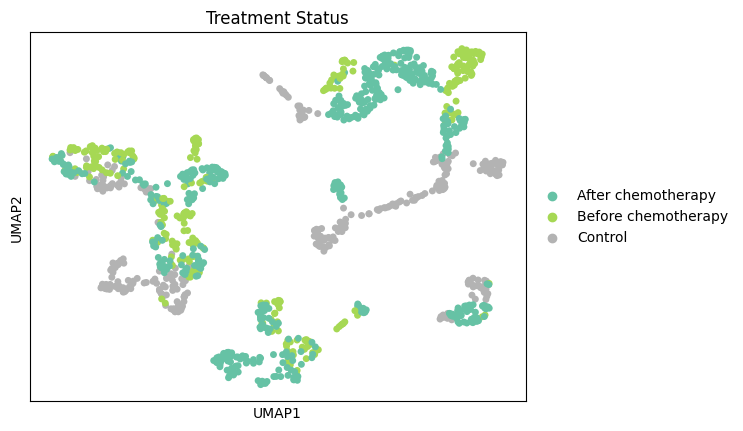

In [21]:
sc.pl.umap(adata, color = ["Treatment Status"], palette='Set2', save = 'treatment_status.png')

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


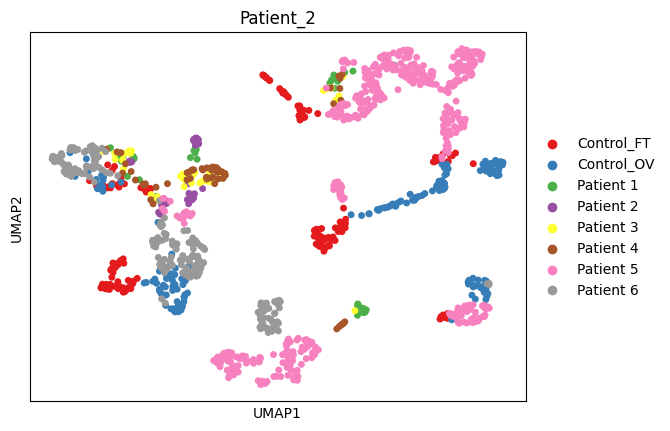

In [22]:
sc.pl.umap(adata, color = ["Patient_2"], palette='Set1', save = 'patient.png')

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


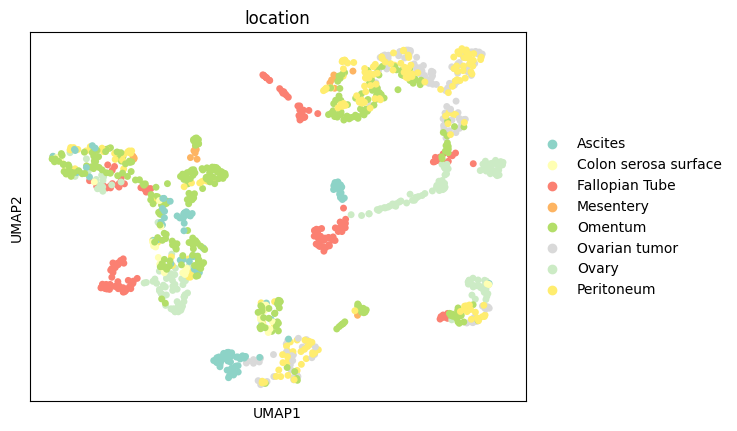

In [23]:
sc.pl.umap(adata, color = ['location'], palette="Set3", save = 'location.png')

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


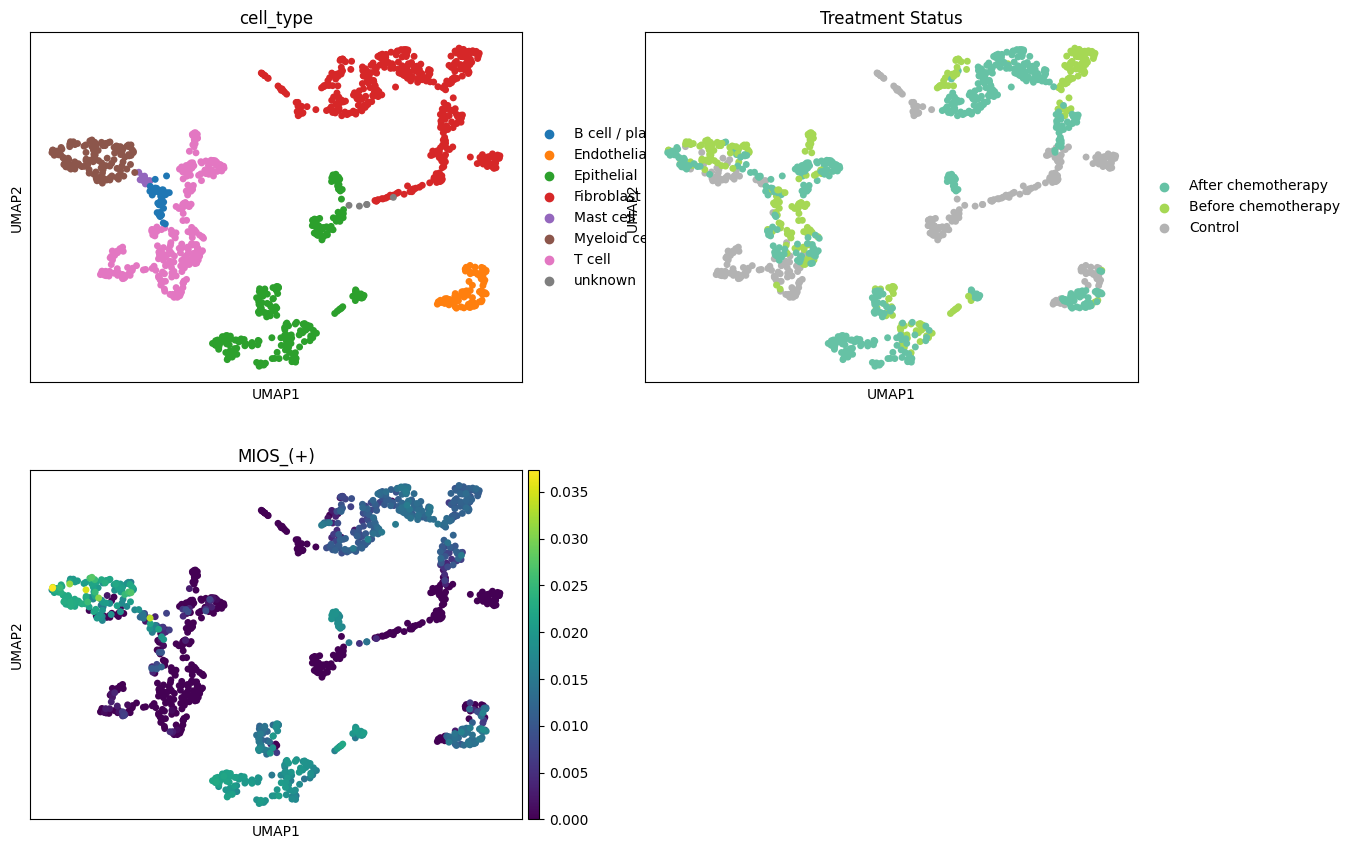

In [26]:
sc.pl.umap(adata, color = ["cell_type", "Treatment Status",'MIOS_(+)'], ncols=2)

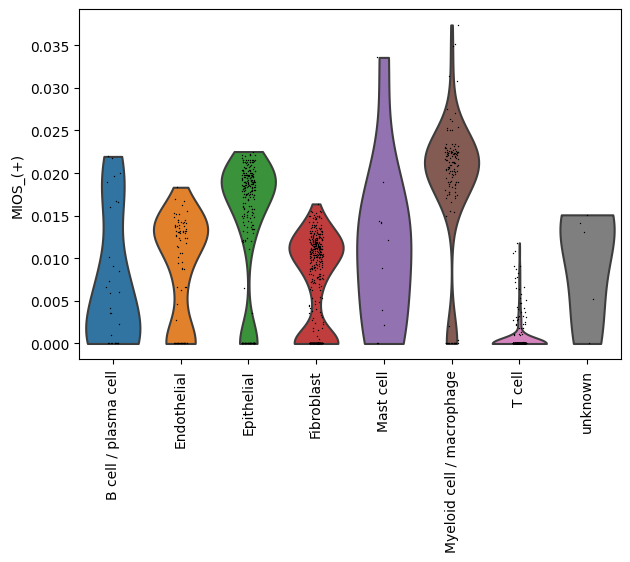

In [29]:
sc.pl.violin(adata, ['MIOS_(+)'], groupby='cell_type', rotation=90)

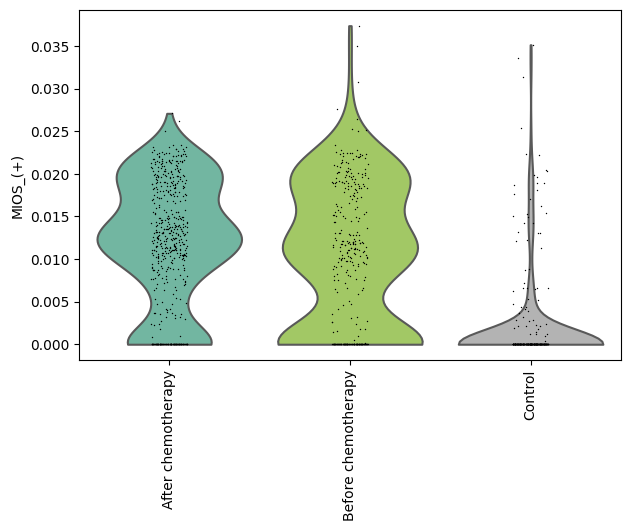

In [30]:
sc.pl.violin(adata, ['MIOS_(+)'], groupby='Treatment Status', rotation=90)

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


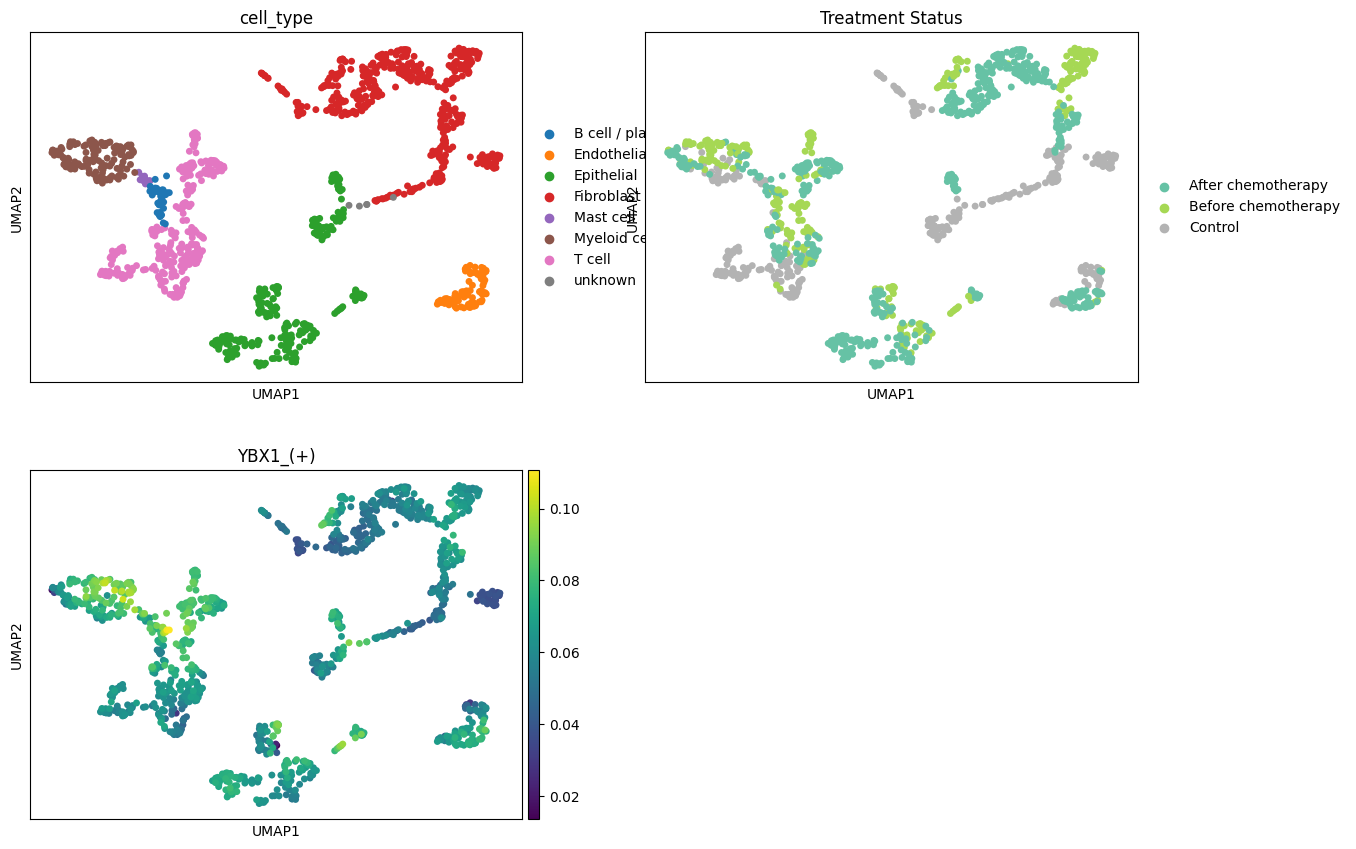

In [27]:
sc.pl.umap(adata, color = ["cell_type", "Treatment Status",'YBX1_(+)'], ncols=2)

In [44]:
adata.obs["Treatment Status"].value_counts()

After chemotherapy     539
Control                347
Before chemotherapy    325
Name: Treatment Status, dtype: int64

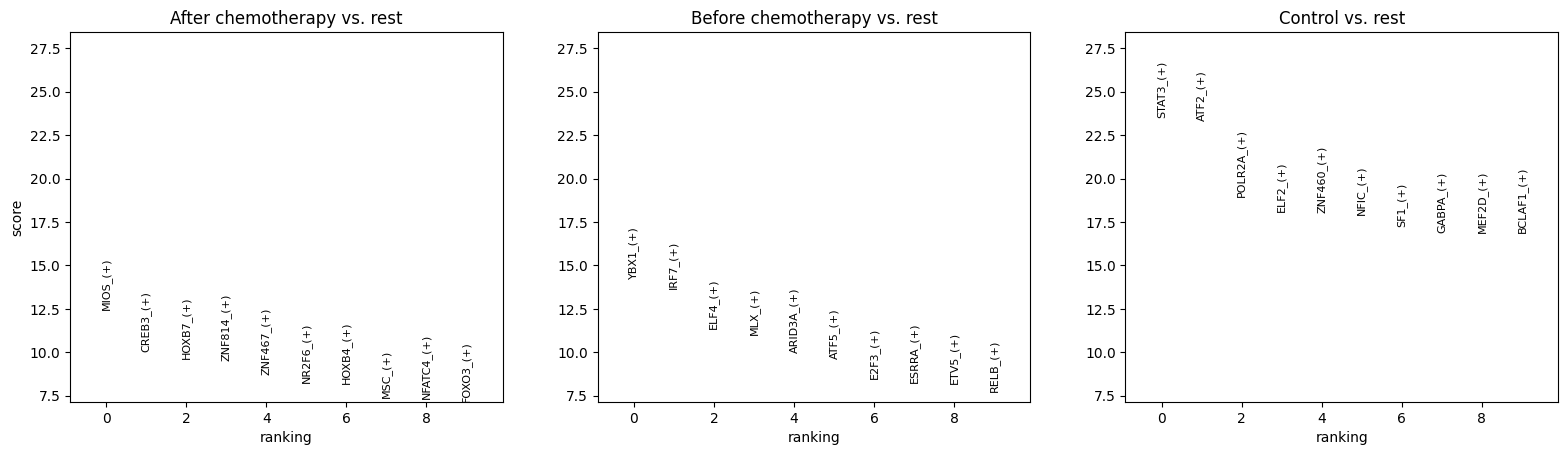

In [45]:
sc.tl.rank_genes_groups(adata, 'Treatment Status', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=True)

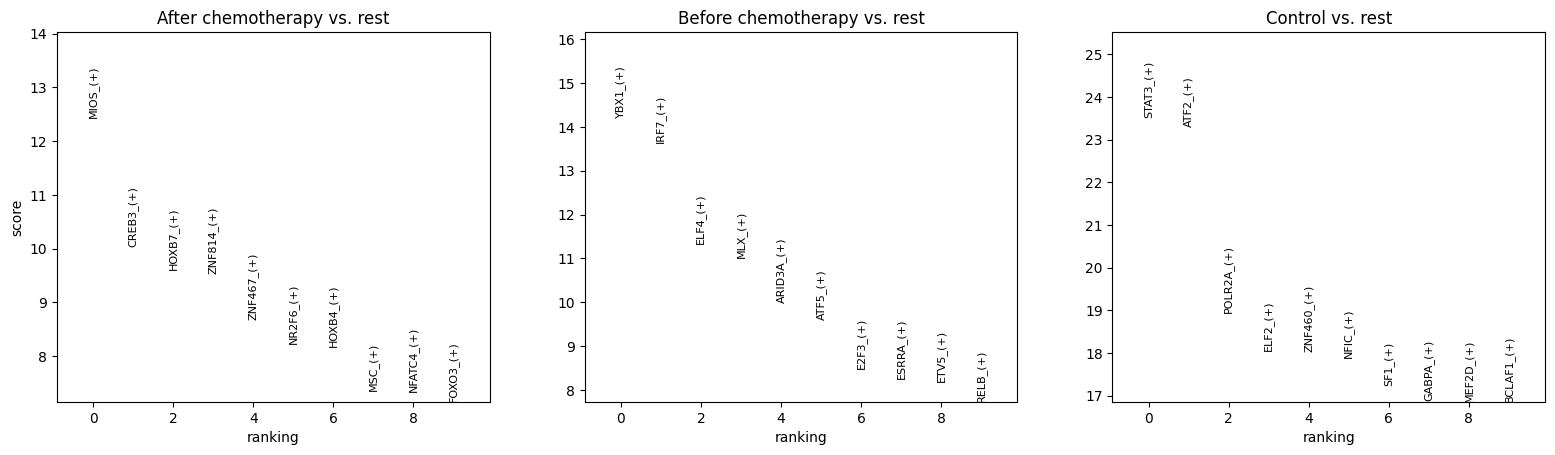

In [46]:
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)